In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import xarray as xr

In [4]:
df_swe_plots = pd.read_csv('../../data/sweden/swe_plots.csv')

In [5]:
df_swe = df_swe_plots.loc[df_swe_plots["voltotal"] > 0]

In [6]:
df_swe["volbirchpct"] = df_swe["volbirch"]/df_swe["voltotal"]
df_swe["volcontortapct"] = df_swe["volcontorta"]/df_swe["voltotal"]
df_swe["volpinepct"] = df_swe["volpine"]/df_swe["voltotal"]
df_swe["volsprucepct"] = df_swe["volspruce"]/df_swe["voltotal"]
df_swe["volotherdec"] = df_swe["volotherdec"]/df_swe["voltotal"]

/home/sato/linda-forest-climate/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sato/linda-forest-climate/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sato/linda-forest-climate/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [7]:
df_swe.head()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,volspruce,volotherdec,pine_spruce_ratio,voltotal,volbirchpct,volcontortapct,volpinepct,volsprucepct
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.134338,0.0,0.00000,275.743796,0.000000,0.000000,353.878134,0.220794,0.0,0.00000,0.779206
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0.000000,0.0,0.00000,3.928420,0.000000,0.000000,3.928420,0.000000,0.0,0.00000,1.000000
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.315784,0.0,0.00000,0.000000,0.000000,NaN,84.315784,1.000000,0.0,0.00000,0.000000
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0.000000,0.0,0.00000,216.131302,0.133228,0.000000,249.352037,0.000000,0.0,0.00000,0.866772
5,2007,306,Skogsm,670513,7114896,18.502274,64.118376,16.051708,0.0,230.90165,20.430038,0.000000,0.918713,267.383396,0.060033,0.0,0.86356,0.076407


In [9]:
ds = xr.open_dataset('/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_cfd.nc')

In [12]:
ds

<xarray.Dataset>
Dimensions:                                                     (height: 1, lat: 364, lon: 329, time: 1)
Coordinates:
  * time                                                        (time) datetime64[ns] 2014-12-31T21:00:00
  * lon                                                         (lon) float32 4.5 ... 31.916414
  * lat                                                         (lat) float32 53.5 ... 71.5
  * height                                                      (height) float64 2.0
Data variables:
    consecutive_frost_days_index_per_time_period                (time, height, lat, lon) float32 ...
    number_of_cfd_periods_with_more_than_5days_per_time_period  (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Wed Jun 05 18:13:21 2019: cdo eca_cfd ./data-temp/mescan-su...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.m

In [14]:
lon = np.array(ds["lon"])

In [68]:
lat = np.flip(np.array(ds["lat"]))

In [69]:
lat[0]

71.5

In [72]:
delta_lon = lon[1] - lon[0]
delta_lat = lat[1] - lat[0]
(delta_lon, delta_lat)

(0.08358669, -0.049583435)

In [73]:
llat = lat.min()
ulat = lat.max()
llon = lon.min()
ulon = lon.max()
(llon, llat, ulon, ulat)

(4.5, 53.5, 31.916414, 71.5)

In [74]:
grid = np.zeros((lon.shape[0], lat.shape[0]))

In [75]:
grid.shape

(329, 364)

In [76]:
# find corresponding pixel of each plot

In [77]:
df_swe["i"] = df_swe["longitude"].apply(lambda x: int(round((x - lon[0]) / delta_lon)))
df_swe["j"] = df_swe["latitude"].apply(lambda x: int(round((x - lat[0]) / delta_lat)) - 1)

/home/sato/linda-forest-climate/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sato/linda-forest-climate/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
df_swe

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,volspruce,volotherdec,pine_spruce_ratio,voltotal,volbirchpct,volcontortapct,volpinepct,volsprucepct,i,j
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.134338,0.000000,0.000000,275.743796,0.000000,0.000000,353.878134,0.220794,0.000000,0.000000,0.779206,167,148
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0.000000,0.000000,0.000000,3.928420,0.000000,0.000000,3.928420,0.000000,0.000000,0.000000,1.000000,168,148
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.315784,0.000000,0.000000,0.000000,0.000000,NaN,84.315784,1.000000,0.000000,0.000000,0.000000,168,148
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0.000000,0.000000,0.000000,216.131302,0.133228,0.000000,249.352037,0.000000,0.000000,0.000000,0.866772,168,148
5,2007,306,Skogsm,670513,7114896,18.502274,64.118376,16.051708,0.000000,230.901650,20.430038,0.000000,0.918713,267.383396,0.060033,0.000000,0.863560,0.076407,168,148
6,2007,312,Skogsm,669921,7114888,18.490133,64.118596,30.301015,0.000000,0.000000,5.976354,0.000000,0.000000,36.277369,0.835259,0.000000,0.000000,0.164741,167,148
7,2007,406,Skogsm,669310,7115473,18.478267,64.124136,38.049796,0.000000,12.426920,112.531485,0.000000,0.099448,163.008201,0.233423,0.000000,0.076235,0.690342,167,148
8,2007,412,Skogsm,669303,7116075,18.478799,64.129532,0.000000,0.000000,0.000000,6.444906,0.000000,0.000000,6.444906,0.000000,0.000000,0.000000,1.000000,167,148
10,2007,106,Skogsm,629720,7131172,17.679743,64.281995,5.878914,1.649994,0.000000,0.000000,0.000000,NaN,7.528907,0.780846,0.219154,0.000000,0.000000,158,145
11,2007,112,Skogsm,630318,7131180,17.692087,64.281840,0.000000,19.230769,0.000000,0.000000,0.000000,NaN,19.230769,0.000000,1.000000,0.000000,0.000000,158,145


In [79]:
df_swe.columns

Index(['year', 'plotid', 'landuseclass', 'easting', 'northing', 'longitude',
       'latitude', 'volbirch', 'volcontorta', 'volpine', 'volspruce',
       'volotherdec', 'pine_spruce_ratio', 'voltotal', 'volbirchpct',
       'volcontortapct', 'volpinepct', 'volsprucepct', 'i', 'j'],
      dtype='object')

In [80]:
rows = lat.shape[0]
columns = lon.shape[0]
size = (rows, columns)
voltotal = np.zeros(size)
volbirch = np.zeros(size)
volcontorta = np.zeros(size)
volpine = np.zeros(size)
volspruce = np.zeros(size)
volotherdec = np.zeros(size)

for idx, row in df_swe.iterrows():
    i = row.i
    j = row.j
    voltotal[j][i] += float(row.voltotal)
    volbirch[j][i] += float(row.volbirch)
    volcontorta[j][i] += float(row.volcontorta)
    volpine[j][i] += float(row.volpine)
    volotherdec[j][i] += float(row.volotherdec)
    volspruce[j][i] += float(row.volspruce)

In [81]:
voltotal[np.where(voltotal > 0)]

array([ 250.66881385,  150.69699993,   30.82069775, ..., 1134.8925508 ,
       1035.44050397,  137.90245609])

In [82]:
np.seterr(divide='ignore', invalid='ignore')
volbirchpct = volbirch / voltotal
volcontortapct = volcontorta / voltotal
volpinepct = volpine / voltotal
volsprucepct = volspruce / voltotal
volotherdecpct = volotherdec / voltotal

volfinal = volbirchpct + volcontortapct + volpinepct + volsprucepct + volotherdecpct

In [83]:
vol_pine_spruce = volpine/(volpine + volspruce)

# PINE/SPRUCE ratio

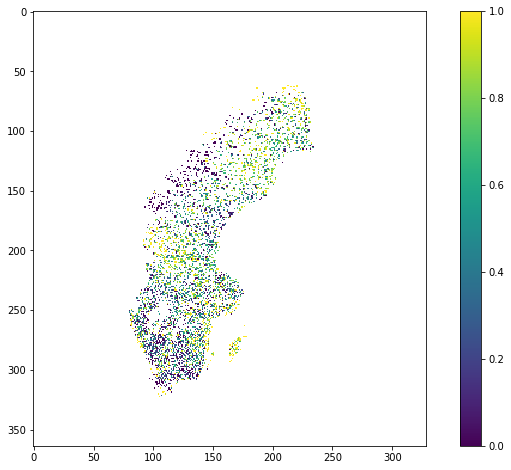

In [84]:
plt.figure(figsize=(12,8))
plt.imshow(vol_pine_spruce)
plt.colorbar()

In [85]:
dataset = Dataset("../../data/sweden/mescan-surfex_pine_spruce.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = vol_pine_spruce
dataset.close()

# BIRCH

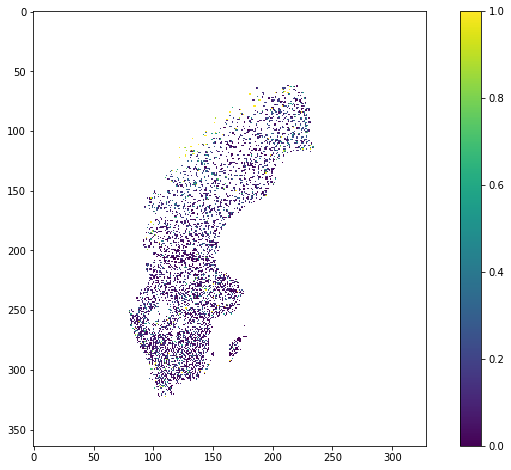

In [87]:
plt.figure(figsize=(12,8))
plt.imshow(volbirchpct)
plt.colorbar()

In [88]:
dataset = Dataset("../../data/sweden/mescan-surfex_birch.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volbirchpct
dataset.close()

# CONTORTA

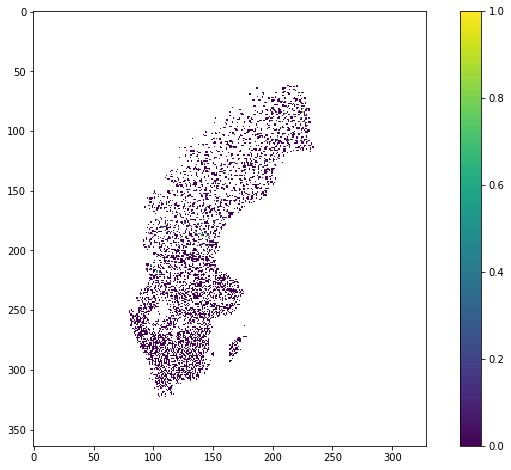

In [89]:
plt.figure(figsize=(12,8))
plt.imshow(volcontortapct)
plt.colorbar()

In [90]:
dataset = Dataset("../../data/sweden/mescan-surfex_contorta.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volcontortapct
dataset.close()

# PINE

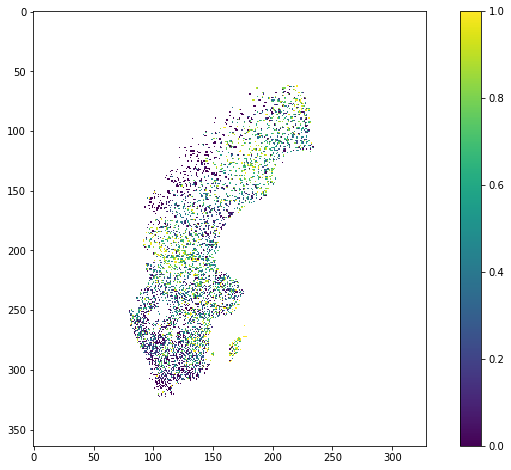

In [91]:
plt.figure(figsize=(12,8))
plt.imshow(volpinepct)
plt.colorbar()

In [92]:
dataset = Dataset("../../data/sweden/mescan-surfex_pine.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volpinepct
dataset.close()

# SPRUCE

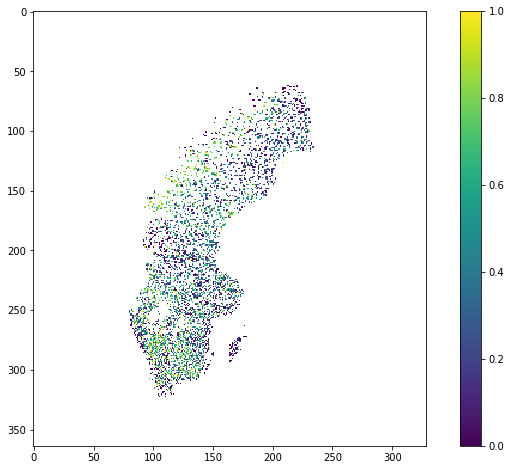

In [93]:
plt.figure(figsize=(12,8))
plt.imshow(volsprucepct)
plt.colorbar()

In [94]:
dataset = Dataset("../../data/sweden/mescan-surfex_spruce.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volsprucepct
dataset.close()

# OTHERDEC

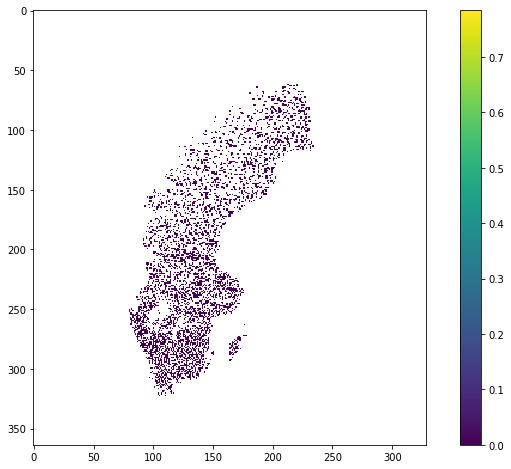

In [95]:
plt.figure(figsize=(12,8))
plt.imshow(volotherdecpct)
plt.colorbar()

In [96]:
dataset = Dataset("../../data/sweden/mescan-surfex_otherdec.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volotherdecpct
dataset.close()

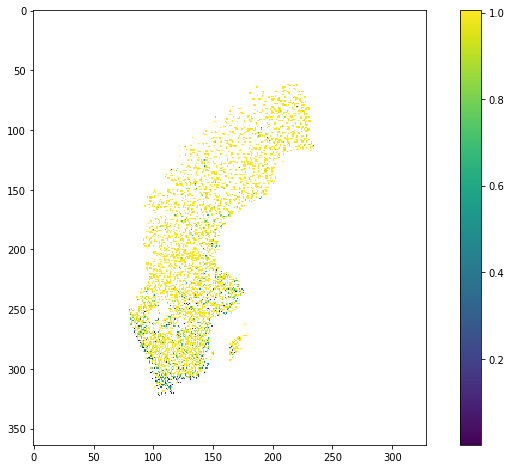

In [97]:
plt.figure(figsize=(12,8))
plt.imshow(volfinal)
plt.colorbar()